# Project description:

*We are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
<br>
<br>
we need to prioritize these hypotheses, launch an A/B test, and analyze the results.*


**Table of Contents**

* [Part 1. Prioritizing Hypotheses : The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.](#h1)
    * [1.1 Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.](#sh1.1)
    * [1.2 Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.](#sh1.2)
    * [1.3 Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.](#sh1.3)
    
* [Part 2. A/B Test Analysis : carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.](#h2)
    * [2.1 Graph cumulative revenue by group. Make conclusions and conjectures.](#sh2.1)
    * [2.2 Graph cumulative average order size by group. Make conclusions and conjectures.](#sh2.2)
    * [2.3 Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.](#sh2.3)
    * [2.4 Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.](#sh2.4)
    * [2.5 Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.](#sh2.5)
    * [2.6 Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.](#sh2.6)
    * [2.7 Plot a scatter chart of order prices. Make conclusions and conjectures.](#sh2.7)
    * [2.8 Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.](#sh2.8)
    * [2.9 Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.](#sh2.9)
    * [2.10 Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.](#sh2.10)
    * [2.11 Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.](#sh2.11)
    * [2.12 Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.](#sh2.12)
    * [2.13 Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.](#sh2.13)
          
* [3. Conclusion](#h3)

<font color='green'><h2> Step 1.  Prioritizing Hypotheses <a class="anchor" id="h1"></a></h2></font>

The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.

In [1]:
#importing all the required files
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

# study general information 
hypotheses.info()
#displaying first 10 rows
hypotheses.head(10)
#reducing all the columns into lowercase
hypotheses.columns = hypotheses.columns.str.replace(' ','_').str.lower()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


<font color='green'><h3>  Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority. <a class="anchor" id="sh1.1"></a></h3></font>

Here we need to find Impact, confidence, effort/ease (ICE) is one of the most popular ways of prioritizing problems.

In [ ]:
# Calculated the ICE for the hypotheses. Added the values the existing table. Named the new column ICE. 'ICE' sorted by the 'ICE' column in descending order.
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence'])/ (hypotheses['effort'])
ice_value = hypotheses.sort_values(by='ICE', ascending=False)
display(ice_value)


ICE gives 8,0,7 and 6 as the most promising hypotheses when we calculated ICE framework and by sorting them in descending order . 

<font color='green'><h3>  Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority. <a class="anchor" id="sh1.2"></a></h3></font>

it is  a modified version, RICE.RICE has four components:
1. Reach — how many users will be affected by the update you want to introduce
2. Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product
3. Confidence — how sure you are that your product will affect them in this way
4. Effort — how much will it cost to test the hypothesis

In [4]:
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'])/hypotheses['effort']
rice_value = hypotheses.sort_values(by='RICE', ascending=False)
display(rice_value)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


this time most promising hypothesis are 7,2,0and 6.this time number 7 is in first place as,because its reach parameter is 10 while others have lowest.

<font color='green'><h3>Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes. <a class="anchor" id="sh1.3"></a></h3></font>


Text(0, 0.5, 'ICE/RICE Score')

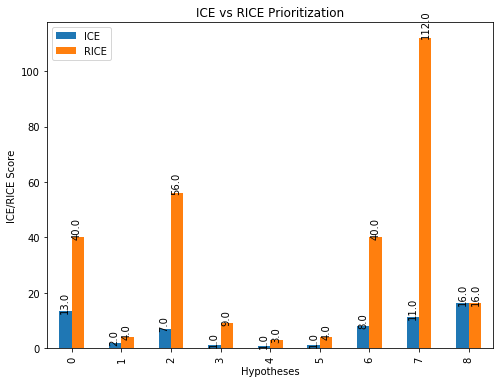

In [5]:
ax = hypotheses[['hypothesis','ICE','RICE']].plot(kind='bar',stacked=False, figsize=(8,6))
for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)
    
plt.title('ICE vs RICE Prioritization')
plt.xlabel('Hypotheses')
plt.ylabel('ICE/RICE Score')

The prioritization of hypotheses changes when we use RICE instead of ICE as it can be seen that the difference between ICE and RICE frameworks is the reach parameter, which estimates how many customers will be reached using polling. This parameters adds another factor to the framework, making RICE scores higher than ICE scores. The RICE framework will be impacted by the reach factor and the RICE score will be  changed according to that. For example, a hypothesis with a low impact confidence parameters will be measured differently with a high reach parameter. this can be analysed in the graph that :in the ICE results, hypothesis 8 is in the highest ranking . However, in the RICE results hypothesis 8 falls to the fifth highest ranking because its reach parameter is low while, hypothesis 7 (which was third highest ranking in ICE results) climbs to the highest ranking becuase its reach parameter is the highest possible value.

<font color='green'><h2> Step 2.  A/B Test Analysis : carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv <a class="anchor" id="h2"></a></h2></font>

In [6]:
#loading the data file orders_us.csv and visits_us.csv
df_orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
df_visits = pd.read_csv('/datasets/visits_us.csv', sep=',')


# studying general information 
df_orders.info()
df_visits.info()
df_orders.head()
df_visits.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
#converting datatype to datetime 
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_visits['date'] = pd.to_datetime(df_visits['date'])

In [8]:
print(df_visits.duplicated().value_counts())

False    62
dtype: int64


In [9]:
datagroup = df_orders.groupby(['visitorId'])['group'].nunique().reset_index().query('group == 1')
datagroup

,visitorId,group
0,5114589,1
1,6958315,1
3,11685486,1
4,39475350,1
5,47206413,1
...,...,...
1025,4259830713,1
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [10]:
df_orders = df_orders[df_orders['visitorId'].isin(datagroup['visitorId'])]
df_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


<font color='green'><h3>Graph cumulative revenue by group. Make conclusions and conjectures. <a class="anchor" id="sh2.1"></a></h3></font>


         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      23      19   2266.6       719
1  2019-08-01     B      17      17    967.2       713
2  2019-08-02     A      42      36   3734.9      1338
3  2019-08-02     B      40      39   3535.3      1294
4  2019-08-03     A      66      60   5550.1      1845
..        ...   ...     ...     ...      ...       ...
57 2019-08-29     B     510     490  74576.7     17708
58 2019-08-30     A     460     437  52363.7     18037
59 2019-08-30     B     531     511  77863.5     18198
60 2019-08-31     A     468     445  53212.0     18736
61 2019-08-31     B     548     528  79651.2     18916

[62 rows x 6 columns]


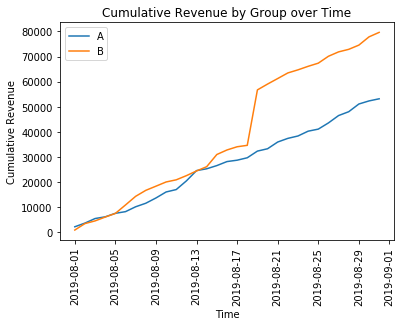

In [11]:

datesGroups = df_orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: df_orders[
        np.logical_and(
            df_orders['date'] <= x['date'], df_orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: df_visits[
        np.logical_and(
            df_visits['date'] <= x['date'], df_visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
print(cumulativeData)

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Cumulative Revenue by Group over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Revenue')
plt.xticks(rotation=90)
plt.show()


We calculated cumulative revenue  for both groups A and B. it can be seen that the cumulative revenue for both groups increases steadily overtime. However, around August 18 and 19 2019, the cumulative revenue of group B had a steap and swift increase from 40,000 dollars to 80,000 dollars and from there kept increasing upward past 80,000 dollars. While the cumulative revenue of group A did kept increasing while there is a sharp increase from 20 august 2019 and moved above 60000 dollars

<font color='green'><h3>Graph cumulative average order size by group. Make conclusions and conjectures. <a class="anchor" id="sh2.2"></a></h3></font>


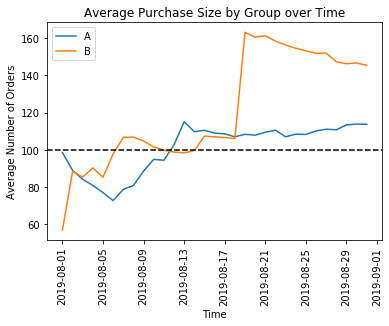

In [12]:
# diving the revenue by the cumulative number of orders
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.axhline(y=100, color='black', linestyle='--')
plt.legend()
plt.title('Average Purchase Size by Group over Time')
plt.xlabel('Time')
plt.ylabel('Average Number of Orders')
plt.xticks(rotation=90)
plt.show()

we calculated and plotted cumulative average order size  for both groups A and B, as shown in the graph above. in the above graph, we saw that group B has a sudden spike in cumulative revenue around August 17 2019 while group A did not have such increase. In this graph, we can see that the average purchase size for group B there is sharp increase tto 160 then again   it started decline to 140.group A still maintain the stability and consistency from august 17

<font color='green'><h3>Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures. <a class="anchor" id="sh2.3"></a></h3></font>


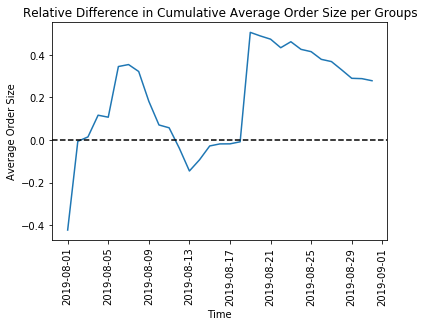

In [13]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Relative Difference in Cumulative Average Order Size per Groups')
plt.xlabel('Time')
plt.ylabel('Average Order Size')
plt.xticks(rotation=90)
plt.show()


 the relative difference in cumulative average order size for group B compared with group A , it can be seen that there is a sudden and considerable changes maybe it happened due to large purchases .the graph drops at 13 august then  there is a sudden rice from 17 august which is sharp and upward .

<font color='green'><h3>Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures. <a class="anchor" id="sh2.4"></a></h3></font>


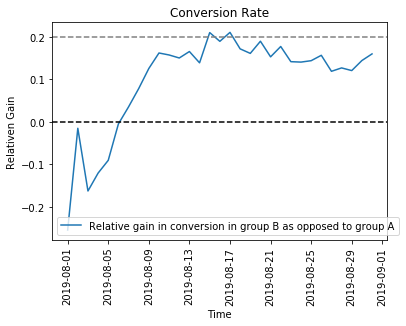

In [14]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
mergedCumulativeConversions = cumulativeDataA[['date','conversion','visitors']].merge(cumulativeDataB[['date','conversion','visitors']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.title('Conversion Rate')
plt.xlabel('Time')
plt.ylabel('Relativen Gain')
plt.xticks(rotation=90)
plt.show()

from each group's conversion rate as the ratio of orders to the number of visits for each day.we Plotted the daily conversion rates of the two groups and find out that group b was leader and as it can be seen that highest peak is at august 17 .As it gained steadily and relativily stabalized by 20% higher than group a .

<font color='green'><h3> Plot a scatter chart of the number of orders per user. Make conclusions and conjectures. <a class="anchor" id="sh2.5"></a></h3></font>


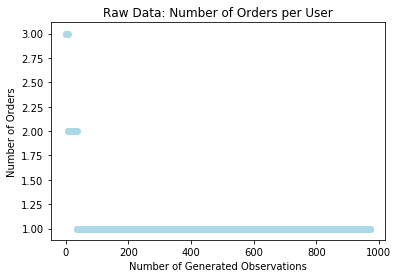

In [15]:
# drop unneccessary columns and group the orders by users
ordersByUsers= df_orders.drop(['group','revenue','date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsers.columns = ['userId', 'orders']

# sort data by number of orders in descending orders
ordersByUsers = ordersByUsers.sort_values(by='orders', ascending=False)

# finding values for horizontal axis  
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'], c='lightblue')
plt.title('Raw Data: Number of Orders per User')
plt.xlabel('Number of Generated Observations')
plt.ylabel('Number of Orders')
plt.show()


 For Plotting a scatter chart of the number of orders per user, we dropped unneccessary columns and group the orders by users.then we sorted no of orders in descending order and plotted the scatter graph .This scatter plot shows the number of orders per users using the raw data with anomalies. As one can see, the number of orders per user is mostly between 1 to 4  orders. Very few users order above 6 or 8 units.

<font color='green'><h3>Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.<a class="anchor" id="sh2.6"></a></h3></font>


In [16]:
#To calculate percentiles, we need the percentile() method from NumPy
print(np.percentile(ordersByUsers['orders'], [95,99]))

[1. 2.]


Not more than 5% of orders are more than 2 units, and not more than 1% orders are more than 4 units.Thus, it would be reasonable to set two or one orders per user as the lower limit for the number of orders and to filter anomalies on that basis. 


<font color='green'><h3>Plot a scatter chart of order prices. Make conclusions and conjectures<a class="anchor" id="sh2.7"></a></h3></font>


,userId,revenue
477,2108080724,3120.1
300,1307669133,1425.8
202,888512513,1335.6
176,759473111,1115.7
938,4133034833,1050.0
...,...,...
887,3896738923,5.2
576,2524310328,5.2
453,1995481842,5.1
283,1224903511,5.1


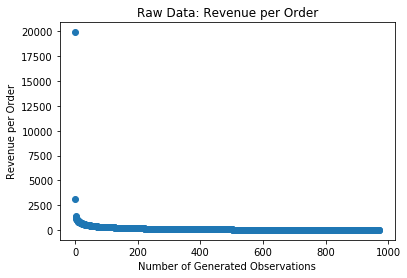

In [17]:
# drop unneccessary columns and group the orders by users
ordersByPrices= df_orders.drop(['group','transactionId','date'], axis=1).groupby('visitorId', as_index=False).agg({'revenue':'sum'})
ordersByPrices.columns = ['userId', 'revenue']

# sort data by number of orders in descending orders
ordersByPrices = ordersByPrices.sort_values(by='revenue', ascending=False)

# find values for horizontal axis by the number of generated observations 
x_values = pd.Series(range(0, len(ordersByPrices)))

plt.scatter(x_values, ordersByPrices['revenue'])

plt.title('Raw Data: Revenue per Order')
plt.xlabel('Number of Generated Observations')
plt.ylabel('Revenue per Order')
ordersByPrices
orderfilter = ordersByPrices[ordersByPrices['revenue'] < 5000]
orderfilter

Text(0, 0.5, 'Revenue per Order')

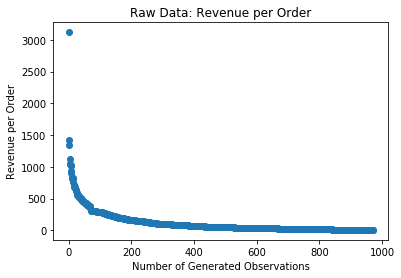

In [18]:
x_values = pd.Series(range(0, len(orderfilter)))

plt.scatter(x_values, orderfilter['revenue'])

plt.title('Raw Data: Revenue per Order')
plt.xlabel('Number of Generated Observations')
plt.ylabel('Revenue per Order')

when we Plotted a scatter chart of order prices.we can see that the revenue per order is mostly below 2500 dollars. Very few orders have revenue above 2500 dollars.

<font color='green'><h3>Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.<a class="anchor" id="sh2.8"></a></h3></font>


In [19]:
#To calculate percentiles, we need the percentile() method from NumPy
print(np.percentile(ordersByPrices['revenue'], [95,99]))

[449.5   912.576]


Not more than 5% of orders prices are more than 510 dollars, and not more than 1% orders prices are more than 1047 dollars.Thus, it would be reasonable to set 510 or lower as the limit for the number of prices per order and to filter anomalies on that basis. 

<font color='green'><h3>Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.<a class="anchor" id="sh2.9"></a></h3></font>


*Alpha = 0.05*
1. Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B. 
2. Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B.

In [20]:
# calculate statistical significance of difference in conversion between groups 
ordersByUsersA = df_orders[df_orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = df_orders[df_orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

# delcare vars with users from different groups and the number of users / group
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

p_value = st.mannwhitneyu(sampleA, sampleB,alternative='two-sided')[1]
print(p_value)

alpha = 0.05

if p_value < alpha:
    print('H0 rejected')
else:
    print('Failed to reject H0')

0.0134018156887569
H0 rejected


first of all we took the sample code for a model, created the variables ordersByUsersA and ordersByUsersB with the columns ['userId', 'orders'], where the number of orders for users with at least one order will be specified.Declared the variables sampleA and sampleB, with users who made orders and the corresponding numbers of orders. Users without orders will have 0. 
Calculated the statistical significance of the difference in conversion based on the results after two weeks of testing. Applied the Mann-Whitney test.Printed the p-value to compare the groups' conversion. 

*. Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B. Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B.

*. The p_value of 0.01 is less than the alpha level of 0.05 which means we can reject the null hypothesis and determine the difference between the conversion rate of groups A and B is statistically significant. This means there is a non-typical shift in the data.

<font color='green'><h3>Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.<a class="anchor" id="sh2.10"></a></h3></font>


*Alpha = 0.05*
1. Null Hypothesis H0: There is no statistically significant difference in average order size between groups A and B.
2. Alternative Hypothesis H1: There is a statistically significant difference in average order size between groups A and B.

In [21]:
p_value = st.mannwhitneyu(df_orders[df_orders['group'] == 'A']['revenue'], df_orders[df_orders['group'] == 'B']['revenue'],alternative='two-sided')[1]
print("{0:.3f}".format(p_value))
alpha = 0.05

if p_value < alpha:
    print('H0 rejected')
else:
    print('Failed to reject H0')

0.862
Failed to reject H0


In this section we find out  the statistical significance of the difference in average order size between the groups using the raw data.  we'll pass the data on revenue to the mannwhitneyu() criterion.

*. Null Hypothesis H0: There is no statistically significant difference in average order size between groups A and B. Alternative Hypothesis H1: There is a statistically significant difference in average order size between groups A and B.

The p_value of 0.35 is greater than than the alpha level of 0.05 which means we can cannnot reject to the null hypothesis and cannot make any conclusions about the difference in average order size. Additionally, it means there is a typical shift in the data.

<font color='green'><h3>Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.<a class="anchor" id="sh2.11"></a></h3></font>

Alpha= 0.05
1. Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B. 
2. Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B.

In [22]:
#finding out the orders greater than 2
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)

# finding out anomalous users with values greater than 500
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 500]['visitorId']

# joining them into abnormal table and removing the  dupliates by sorting them 
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

# calculated statistical signifiacne of the difference in conversion between groups using filtered data
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered,alternative='two-sided')[1]
print("{0:.5f}".format(p_value))

alpha = 0.05

if p_value < alpha:
    print('H0 rejected')
else:
    print('Failed to reject H0')

0.00746
H0 rejected


here we have to find out the statistical significance of the difference in conversion between the groups using the filtered data. in which we took the number of orders greater than 2 and prices greater than 500 then calculated the stastical significance difference by using mannwhitney test. we took the alpha value to 0.05

*. Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B. Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B.

*. The p_value of 0.005 is still less than the alpha level of 0.05 which means we can reject the null hypothesis and determine the difference between the conversion rate of groups A and B is statistically significant. This means there is a non-typical shift in the data.

<font color='green'><h3>Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.<a class="anchor" id="sh2.12"></a></h3></font>

Alpha=0.05
1. Null Hypothesis H0: There is no statistically significant difference in average order size between groups A and B. 
2. Alternative Hypothesis H1: There is a statistically significant difference in average order size between groups A and B.

In [23]:
p_value = st.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],alternative='two-sided')[1]
print("{0:.3f}".format(p_value))

alpha = 0.05

if p_value < alpha:
    print('H0 rejected')
else:
    print('Failed to reject H0')

0.889
Failed to reject H0


here we will Find out the statistical significance of the difference in average order size between the groups using the filtered data.We can filter the data such that we only have rows with 2 or less orders and that have a revenue of 500 dollars of less.

Null Hypothesis H0: There is no statistically significant difference in average order size between groups A and B. Alternative Hypothesis H1: There is a statistically significant difference in average order size between groups A and B.

The p_value of 0.455 is greater than than the alpha level of 0.05 which means we can cannnot reject to the null hypothesis and cannot make any conclusions about the difference in average order size. Additionally, it means there is a typical shift in the data.

<font color='green'><h3>Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.<a class="anchor" id="sh2.13"></a></h3></font>

What conclusions that can we drawn from this test are: 

1.  Raw data revealed that the difference between the conversion rate of groups A and B is statistically significant between the groups.The p_value of 0.01 is less than the alpha level of 0.05 which means we can reject the null hypothesis 
2.  Raw data determined that there is a statistically significant difference in average order size between groups A and B.The p_value of 0.35 is greater than than the alpha level of 0.05 which means we can cannnot reject to the null hypothesis and cannot make any conclusions about the difference in average order size.
3. filtered data revealed there is no  statistically significant differences in  average order size between the groups.The p_value of 0.005 is still less than the alpha level of 0.05 which means we can reject the null hypothesis
4.  The p_value of 0.455 is greater than than the alpha level of 0.05 which means we can cannnot reject to the null hypothesis and cannot make any conclusions about the difference in average order size.
<br>

*The graph showing the difference in conversion between the groups tells us that  group B is the better group in which in invest resources. They generate greater cumulative revenue and have higher average order sizes.*
 Thus we decided to stop the test, call it a success, considering group B better than group A.